#### Arlington, MA water bills from August 2016

Draft, no comments, as is, good luck!

In [2]:
import pandas as pd

In [2]:
meters=pd.read_excel('/home/sth/SciAdv/res/data/DOR/meters.xls',
                     header=None,names=['meter','alt','streetNum','streetName'])
##meters

In [3]:
def bills(foo,meter):
    df=foo[7][[0,2,4,6,8,10,12]]
    cols=df.iloc[:1].values
    df=df.iloc[1:]
    df.columns=cols.tolist()
    df["account"]=meter
    return df

In [4]:
def propertyID(foo,meter):
    df=pd.DataFrame(foo[1][0]).transpose()
    if(len(foo[1][0])==4):
        df.columns = ["owner","address1","address2","city/state/zip"]
    elif (len(foo[1][0])==3):
        df.columns = ["owner","address1","city/state/zip"]
        df["missing"]="missing"
    df["account"]=meter
    dproperty=df

    df=pd.DataFrame()
    for i in range(len(foo[2])):
        df1=pd.DataFrame(foo[2][0].str.split(":")[i])
        cols=df1.iloc[:1].values
        df1=df1.iloc[1:2]
        df1.columns=cols
        df=pd.concat([df,df1],axis=1)
    df["property"]=foo[2].iloc[4,2]
    df=df.reset_index(drop=True)
    dproperty=pd.concat([dproperty,df],axis=1)

    ####meter size and readings
    df=foo[5][[0,2,4,6,8]]
    cols=df.iloc[:1].values
    df=df.iloc[1:2]
    df.columns=cols.tolist()
    df=df.reset_index(drop=True)
    dproperty=pd.concat([dproperty,df],axis=1)

    return dproperty

In [5]:
stub = 'https://secure.town.arlington.ma.us/Billing/Scripts/WaterStatement.pl?Account='
for meter in meters.meter:
    try:
        foo=pd.read_html(stub+str(meter))
    except:
        print("html failed " + str(meter))
    try:
        prop = propertyID(foo,meter)
        prop.to_csv("/home/sth/SciAdv/res/data/DOR/water.tsv",
                    sep="\t",header=None,mode="a",index=None)
    except:
        print("prop failed " + str(meter))
    try:
        bill = bills(foo,meter)
        bill.to_csv("/home/sth/SciAdv/res/data/DOR/water_bills.tsv",
                    sep="\t",header=None,mode="a",index=None)
    except:
        print("bill failed " + str(meter))

In [ ]:
water = pd.read_csv("/home/sth/SciAdv/res/data/DOR/water_bills.tsv",
                    sep="\t",header=None,parse_dates=[0,1])

##### Remove duplicates due to multiple meters for one bill

In [ ]:
water.columns = ['issued','dueDate','usage','balance','amount','charges','total','account']
water=water.drop_duplicates()

##### deadbeats

In [21]:
water.sort_values('charges',ascending=False).iloc[:20]

,issued,dueDate,usage,balance,amount,charges,total,account
72178,2015-10-21,2015-12-02,285,3793.11,3793.11,340.86,4133.97,606150000
369,2016-01-19,2016-03-07,236,3128.67,3128.67,198.32,3326.99,101044000
368,2016-04-19,2016-05-19,292,3888.03,3888.03,168.91,4056.94,101044000
64115,2015-07-17,2015-08-17,103,1325.19,1325.19,157.93,1483.12,510142000
21592,2015-10-21,2015-11-23,120,1555.71,1555.71,143.64,1699.35,207174000
55925,2015-07-17,2015-08-17,89,1135.35,1135.35,135.31,1270.66,503052000
42893,2015-07-17,2015-08-17,85,1081.11,1081.11,128.84,1209.95,402146500
55924,2015-10-21,2015-11-23,102,1311.63,1311.63,121.10,1432.73,503052000
39574,2015-10-21,2015-11-23,94,1203.15,1203.15,111.09,1314.24,316090000
1013,2015-07-17,2015-08-17,69,864.15,864.15,102.99,967.14,101141000


##### Zero usage?

In [15]:
water[water.issued=="2016-10-21"].sort_values('usage',ascending=True).iloc[:20]

,issued,dueDate,usage,balance,amount,charges,total,account
76254,2016-10-21,2016-11-21,0,10.71,10.71,0.0,10.71,610160000
24660,2016-10-21,2016-11-21,0,10.71,10.71,0.0,10.71,301010000
24678,2016-10-21,2016-11-21,0,0.00,0.00,0.0,0.00,301011000
2208,2016-10-21,2016-11-21,0,10.71,10.71,0.0,10.71,103012000
24792,2016-10-21,2016-11-21,0,10.71,0.00,0.0,0.00,301027800
25002,2016-10-21,2016-11-21,0,13.98,13.98,0.0,13.98,301061000
25116,2016-10-21,2016-11-21,0,10.71,10.71,0.0,10.71,301079000
25122,2016-10-21,2016-11-21,0,10.71,10.71,0.0,10.71,301080500
25140,2016-10-21,2016-11-21,0,10.71,10.71,0.0,10.71,301082500
25236,2016-10-21,2016-11-21,0,10.71,10.59,0.0,10.59,301096000


#### Charts

In [11]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylab as pl


%matplotlib inline  

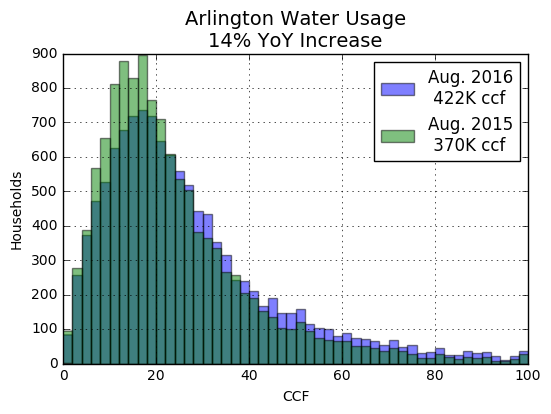

In [14]:
#water["total"].hist(alpha=0.5, bins=10,figsize=(22,22));
axes1=(water["usage"][water["issued"]=="2016-10-21"][water['usage']>0]).hist(alpha=0.5, bins=50, range=(0,100));
axes2=(water["usage"][water["issued"]=="2015-10-21"][water['usage']>0]).hist(alpha=0.5, bins=50, range=(0,100));

tot2015 = round(sum(water["usage"][water["issued"]=="2015-10-21"][water['usage']>0]),-3)/1e3
tot2016 = round(sum(water["usage"][water["issued"]=="2016-10-21"][water['usage']>0]),-3)/1e3
plt.legend(["Aug. 2016\n " + str(tot2016).replace('.0','') + 'K ccf',
            "Aug. 2015\n " + str(tot2015).replace('.0','') + 'K ccf'])

pl.xlabel('CCF')
pl.ylabel('Households')
pl.title("Arlington Water Usage\n" + \
         str(round(100*(tot2016/tot2015-1),0)).replace('.0','') +\
         "% YoY Increase",fontsize=14)

In [28]:
water.issued.unique()

array(['2016-10-21T00:00:00.000000000', '2016-07-19T00:00:00.000000000',
       '2016-04-19T00:00:00.000000000', '2016-01-19T00:00:00.000000000',
       '2015-10-21T00:00:00.000000000', '2015-07-17T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
aug2016=water[["account","usage"]][water["issued"]=="2016-10-21"][water['usage']>0]
may2016=water[["account","usage"]][water["issued"]=="2016-07-19"][water['usage']>0]
aug2015=water[["account","usage"]][water["issued"]=="2015-10-21"][water['usage']>0]

df0=pd.merge(aug2016,aug2015,on="account",how="left")
df=pd.merge(df0,may2016,on="account",how="left")

df.columns=['account','aug2016','aug2015','may2016']
df['YoY2Qpct']=round(100*(df.aug2016/df.aug2015-1),1)
df['QoQ2Qpct']=round(100*(df.aug2016/df.may2016-1),1)
df.

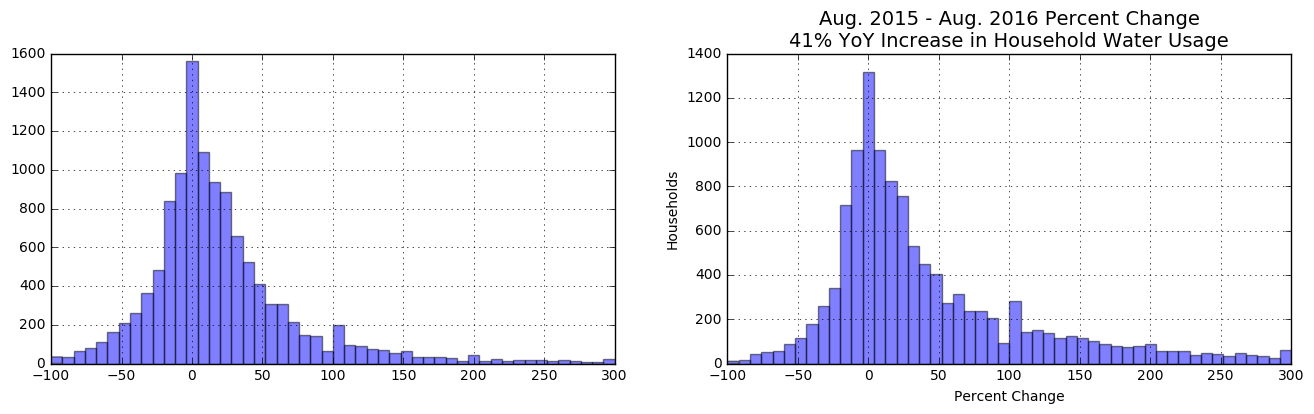

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16,4))

df['YoY2Qpct'].hist(alpha=0.5, bins=50, range=(-100,300), ax=axes[0]);

#pl.legend(["Aug 2016/2015"])

pl.xlabel('Percent Change')
pl.ylabel('Households')
pl.title("Aug. 2015 - Aug. 2016 Percent Change\n" + \
         str(round(df['YoY2Qpct'].mean(),0)).replace('.0','') +\
         "% YoY Increase in Household Water Usage",fontsize=14)

df['QoQ2Qpct'].hist(alpha=0.5, bins=50, range=(-100,300),ax=axes[1]);


In [90]:
df['YoY2Qpct'].mean()
df['QoQ2Qpct'].mean()

71.532839749917727

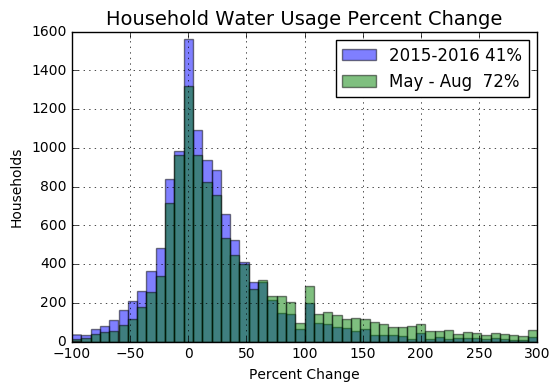

In [124]:
df['YoY2Qpct'].hist(alpha=0.5, bins=50, range=(-100,300));
df['QoQ2Qpct'].hist(alpha=0.5, bins=50, range=(-100,300),color='green');

plt.legend(["2015-2016 " + str(round(df['YoY2Qpct'].mean(),0)).replace('.0','') + '%',
            "May - Aug  " + str(round(df['QoQ2Qpct'].mean(),0)).replace('.0','') + '%'
           ])

pl.xlabel('Percent Change')
pl.ylabel('Households')
pl.title("Household Water Usage Percent Change",fontsize=14)



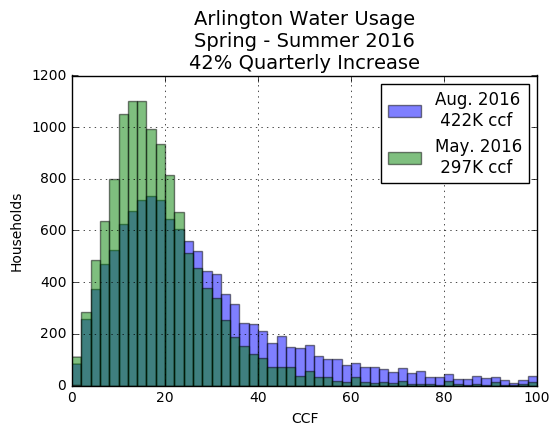

In [131]:
#water["total"].hist(alpha=0.5, bins=10,figsize=(22,22));
axes1=(water["usage"][water["issued"]=="2016-10-21"][water['usage']>0]).hist(alpha=0.5, bins=50, range=(0,100));
axes2=(water["usage"][water["issued"]=="2016-07-19"][water['usage']>0]).hist(alpha=0.5, bins=50, range=(0,100));

tot2015 = round(sum(water["usage"][water["issued"]=="2016-07-19"][water['usage']>0]),-3)/1e3
tot2016 = round(sum(water["usage"][water["issued"]=="2016-10-21"][water['usage']>0]),-3)/1e3
plt.legend(["Aug. 2016\n " + str(tot2016).replace('.0','') + 'K ccf',
            "May. 2016\n " + str(tot2015).replace('.0','') + 'K ccf'])

pl.xlabel('CCF')
pl.ylabel('Households')
pl.title("Arlington Water Usage\nSpring - Summer 2016\n" + \
         str(round(100*(tot2016/tot2015-1),0)).replace('.0','') +\
         "% Quarterly Increase",fontsize=14)

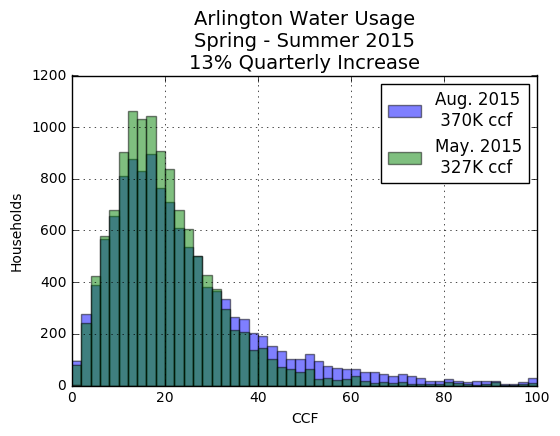

In [130]:
#water["total"].hist(alpha=0.5, bins=10,figsize=(22,22));
axes1=(water["usage"][water["issued"]=="2015-10-21"][water['usage']>0]).hist(alpha=0.5, bins=50, range=(0,100));
axes2=(water["usage"][water["issued"]=="2015-07-17"][water['usage']>0]).hist(alpha=0.5, bins=50, range=(0,100));

tot2015 = round(sum(water["usage"][water["issued"]=="2015-07-17"][water['usage']>0]),-3)/1e3
tot2016 = round(sum(water["usage"][water["issued"]=="2015-10-21"][water['usage']>0]),-3)/1e3
plt.legend(["Aug. 2015\n " + str(tot2016).replace('.0','') + 'K ccf',
            "May. 2015\n " + str(tot2015).replace('.0','') + 'K ccf'])

pl.xlabel('CCF')
pl.ylabel('Households')
pl.title("Arlington Water Usage\nSpring - Summer 2015\n" + \
         str(round(100*(tot2016/tot2015-1),0)).replace('.0','') +\
         "% Quarterly Increase",fontsize=14)